In [9]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt

In [13]:
temperature_data = pd.read_csv('../data/global_temperature.csv')

In [14]:
temperature_data

,Year,Temperature
0,2011,-0.1
1,2012,-0.2
2,2013,-0.1
3,2014,0.0
4,2015,0.1
5,2016,0.2
6,2017,0.0
7,2018,0.1
8,2019,0.9
9,2020,1.0


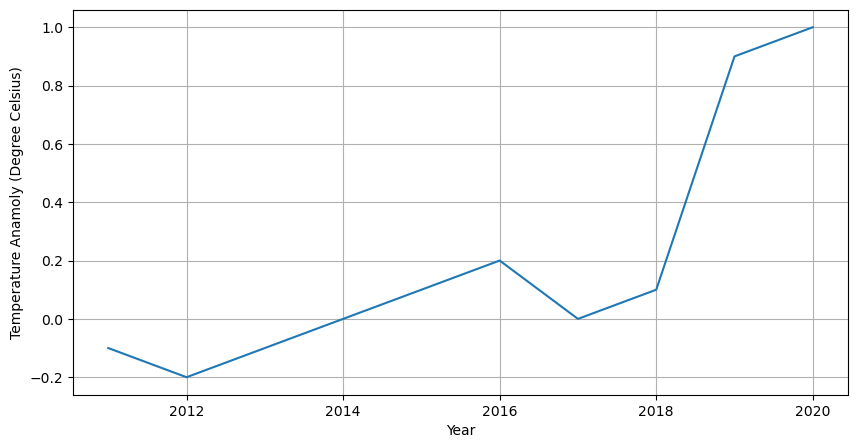

In [15]:
# Visual the temperature data
plt.figure(figsize=(10,5))
plt.plot(temperature_data['Year'], temperature_data['Temperature'])
plt.xlabel('Year')
plt.ylabel('Temperature Anamoly (Degree Celsius)')
plt.grid()
plt.show()

In [16]:
co2_data = pd.read_csv('../data/co2_emissions.csv')

In [17]:
co2_data

,Year,CO2 Emissions
0,2011,315.7
1,2012,316.5
2,2013,317.2
3,2014,318.1
4,2015,318.7
5,2016,319.6
6,2017,320.3
7,2018,321.1
8,2019,411.9
9,2020,413.1


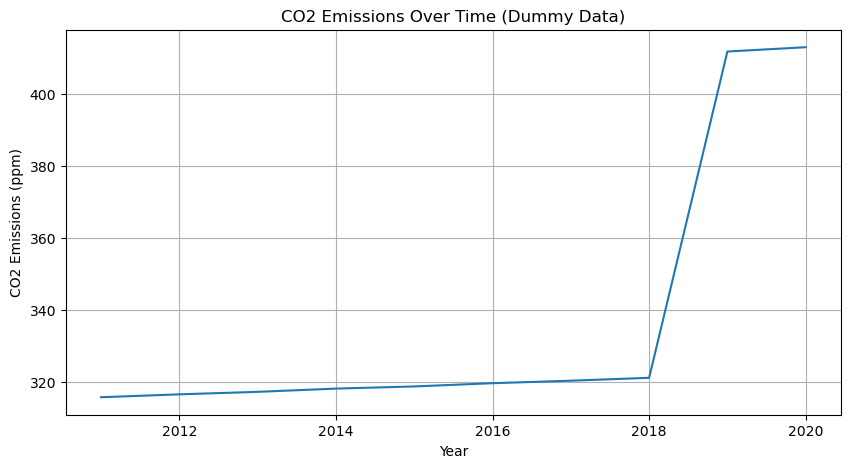

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(co2_data['Year'], co2_data['CO2 Emissions'])
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (ppm)')
plt.title('CO2 Emissions Over Time (Dummy Data)')
plt.grid()
plt.show()

In [26]:
from statsmodels.tsa.arima.model import ARIMA # type: ignore

In [58]:
# Splitting the data into training and testing sets
def split_data(data, train_size = 0.5):
    train_size = int(len(data)*train_size)
    train, test = data[:train_size], data[train_size:]
    return train, test

In [59]:
# Model function
def fit_arima_model(train_data, test_data, order=(5,1,0)):
    model = ARIMA(train_data, order=order)
    arima = model.fit()
    pred = arima.forecast(steps = len(test_data))
    return pred

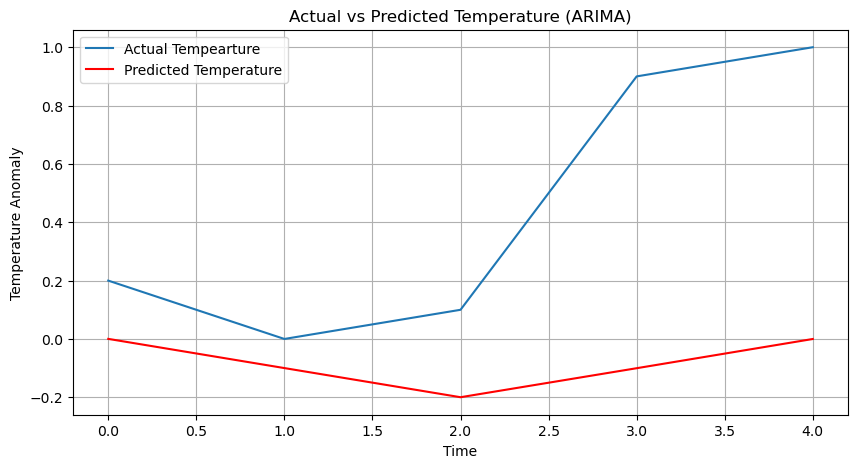

In [60]:
# Temperature forecasting
train_temp, test_temp = split_data(temperature_data['Temperature'].values)
temp_pred = fit_arima_model(train_temp, test_temp)

# Visualizization of predicted and actual values
plt.figure(figsize=(10,5))
plt.plot(test_temp, label = 'Actual Tempearture')
plt.plot(temp_pred, label = 'Predicted Temperature', color = 'red')
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly')
plt.title('Actual vs Predicted Temperature (ARIMA)')
plt.legend()
plt.grid()
plt.show()

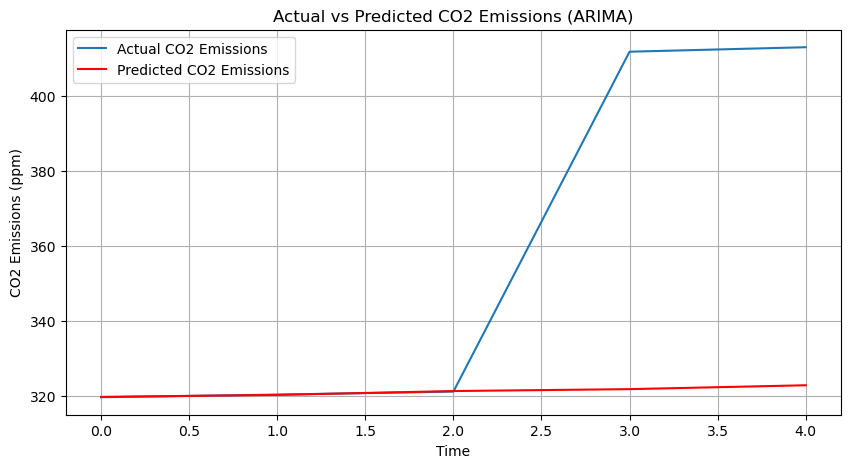

In [61]:
train_co2, test_co2 = split_data(co2_data['CO2 Emissions'].values)

co2_predictions = fit_arima_model(train_co2, test_co2)

# Plot CO2 Predictions vs Actual
plt.figure(figsize=(10, 5))
plt.plot(test_co2, label='Actual CO2 Emissions')
plt.plot(co2_predictions, label='Predicted CO2 Emissions', color='red')
plt.xlabel('Time')
plt.ylabel('CO2 Emissions (ppm)')
plt.title('Actual vs Predicted CO2 Emissions (ARIMA)')
plt.legend()
plt.grid()
plt.show()

In [68]:
# # Hyperparameter tuning
# def tune_arima_model(train_data, test_data, p, d, q):
#     best_score, best_cfg = float('inf'), None
#     for p in p_values:
#         for d in d_values:
#             for q in q_values:
#                 try:
#                     pred,model = fit_arima_model(train_data, test_data, order = (p,d,q))
#                     error = mean